# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# cities = ['hamilton', 'london', 'ottawa']

Number of cities in the list: 591


In [2]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3f9a945707d2e979272bb05f87837e4


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | tulun
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | gadzhiyevo
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | pivijay
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | kodinsk
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | alvear
Processing Record 18 of Set 1 | rajshahi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | bereznik
Processing Record 22 of Set 1 | sao vicente
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,29.25,75,47,7.73,TC,1694499962
1,tulun,54.5611,100.5792,17.74,39,28,3.65,RU,1694500153
2,waitangi,-43.9535,-176.5597,11.01,87,52,8.49,NZ,1694500153
3,ushuaia,-54.8000,-68.3000,2.81,87,0,2.06,AR,1694500067
4,gadzhiyevo,69.2551,33.3362,14.60,86,100,10.56,RU,1694500154


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,29.25,75,47,7.73,TC,1694499962
1,tulun,54.5611,100.5792,17.74,39,28,3.65,RU,1694500153
2,waitangi,-43.9535,-176.5597,11.01,87,52,8.49,NZ,1694500153
3,ushuaia,-54.8000,-68.3000,2.81,87,0,2.06,AR,1694500067
4,gadzhiyevo,69.2551,33.3362,14.60,86,100,10.56,RU,1694500154


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

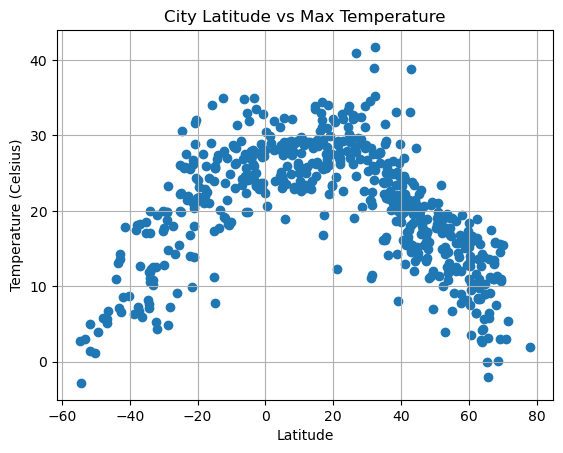

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

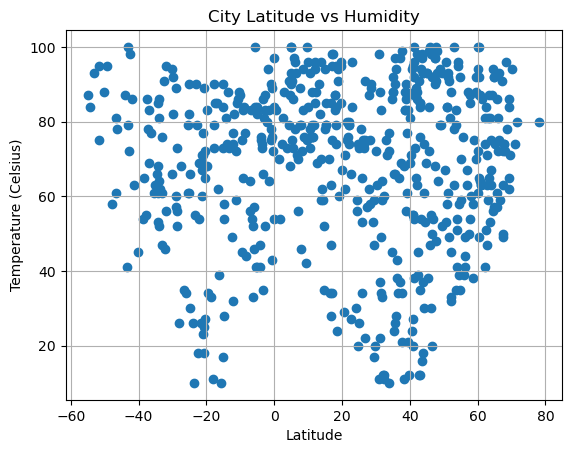

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

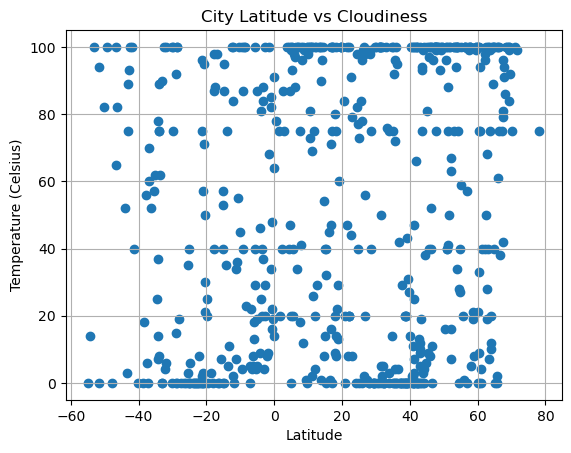

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

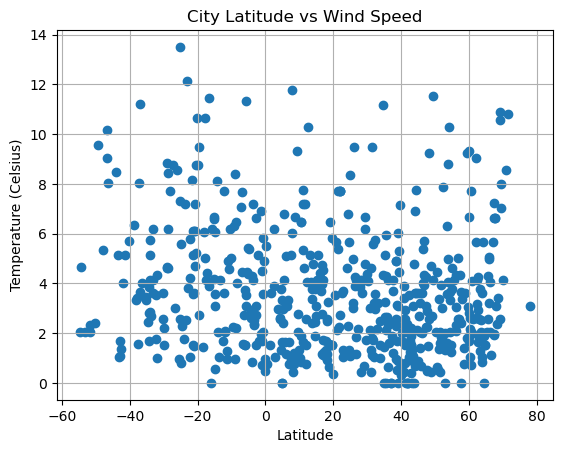

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.15617780118844007


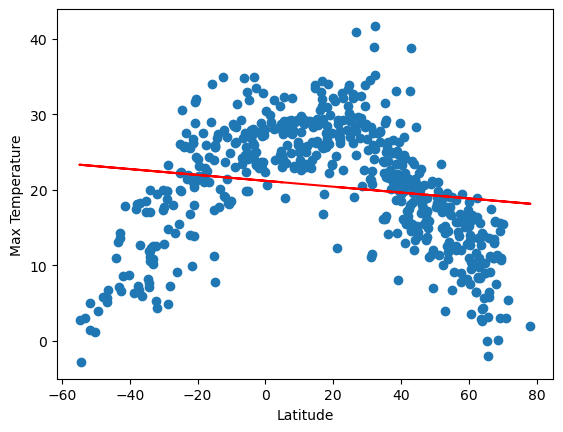

In [15]:
# Define a function to create Linear Regression plots
#####LAT VS MAX TEMP#######
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.013812798389285697


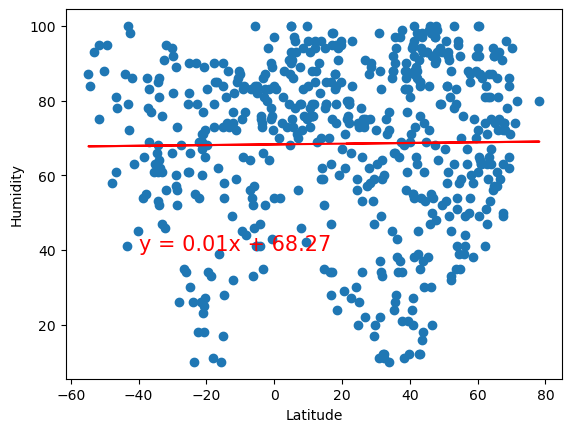

In [16]:
# Define a function to create Linear Regression plots
#####LAT VS Humidity#######
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1526570024388489


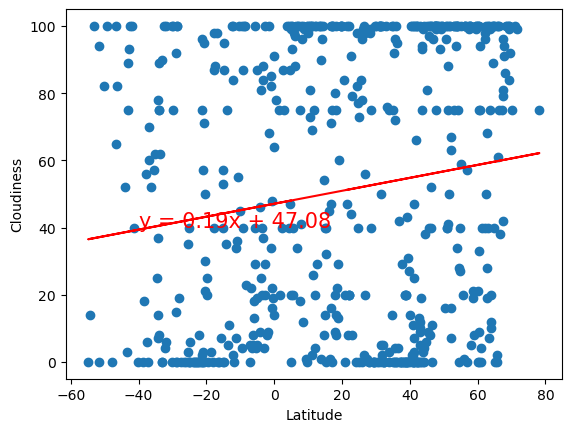

In [17]:
# Define a function to create Linear Regression plots
#####LAT VS Cloudiness#######
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.18604522914153965


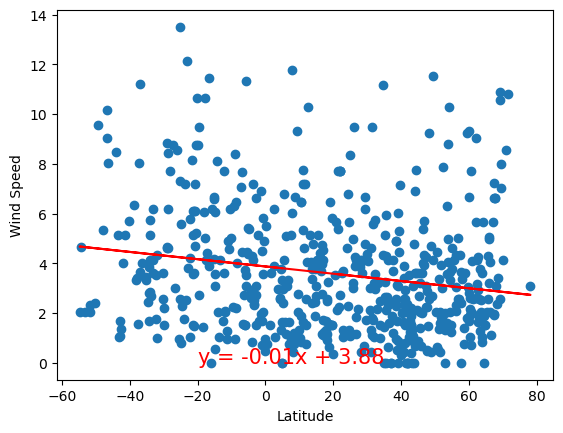

In [18]:
# Define a function to create Linear Regression plots
#####LAT VS Wind Speed#######
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,29.25,75,47,7.73,TC,1694499962
1,tulun,54.5611,100.5792,17.74,39,28,3.65,RU,1694500153
4,gadzhiyevo,69.2551,33.3362,14.60,86,100,10.56,RU,1694500154
6,yellowknife,62.4560,-114.3525,16.34,84,100,4.12,CA,1694500155
7,taoudenni,22.6783,-3.9836,32.86,27,91,3.63,ML,1694500155


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,11.01,87,52,8.49,NZ,1694500153
3,ushuaia,-54.8000,-68.3000,2.81,87,0,2.06,AR,1694500067
5,port alfred,-33.5906,26.8910,12.32,62,62,2.68,ZA,1694500154
8,avarua,-21.2078,-159.7750,21.03,60,96,5.14,CK,1694500156
11,saint-pierre,-21.3393,55.4781,26.21,69,75,1.54,RE,1694500157


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7721426059061164


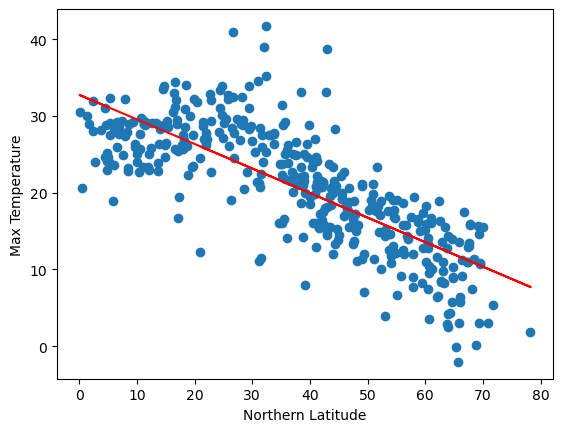

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7957328210929475


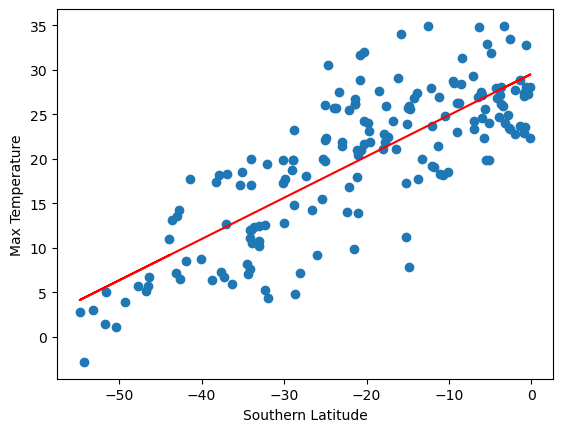

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.0567045818222964


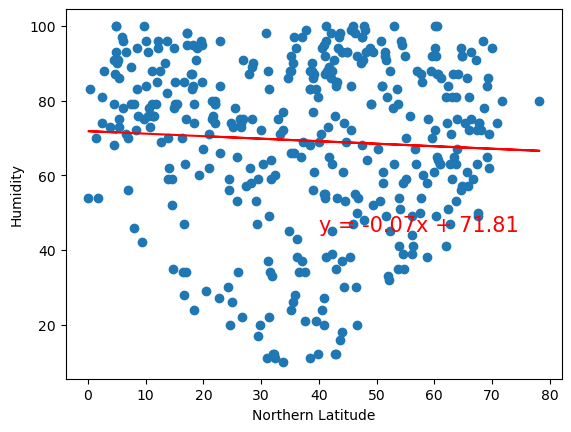

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.0714796973355864


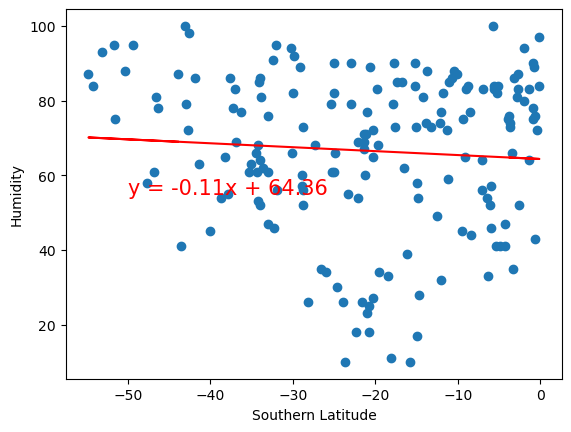

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.058944414164278106


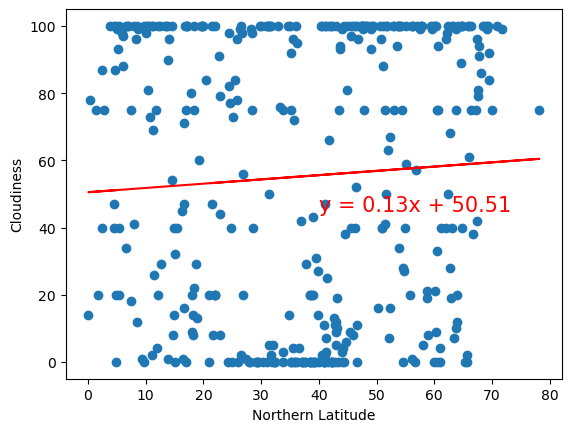

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.06353691140094599


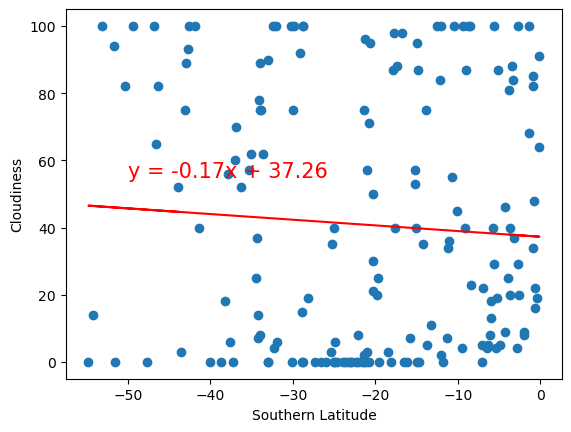

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.031160468763541355


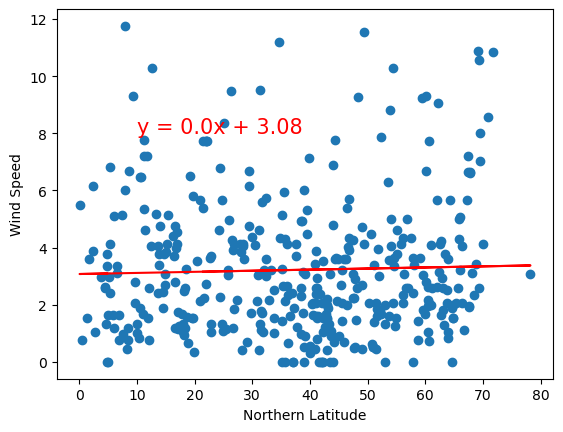

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.09741921128574052


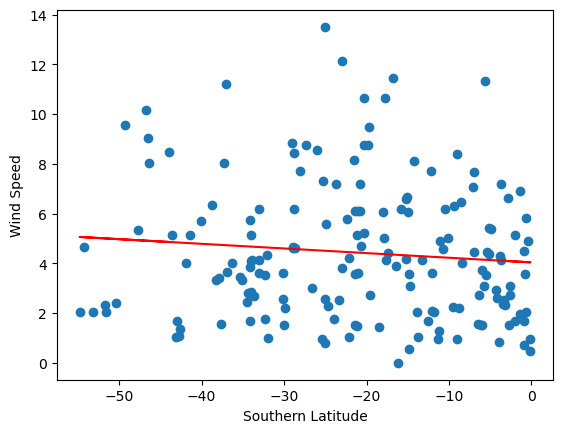

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE